# For Path 1

Author- Akshay Laxman Powar
This Notebook Plots the path generated from each source namely Arduino, Smartphone, Piksi onto a map.
Also used to convert the latitude and longitude data into the distance travelled from the start point into the meters as well.

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from math import sin, cos, sqrt, atan2, radians
import pyproj
from datetime import datetime


In [7]:
#Setting up Initial and Final GPS coordinates
init_lat, init_lon = 48.781655, 11.475326
middle_lat, middle_lon = 48.781536, 11.475744
final_lat, final_lon = 48.781006, 11.475486

In [2]:
# function to calculate the distance between two gps co-ordinates
def dist_in_meters(lat1, lon1, lat2, lon2):
    R = 6371000  # radius of the Earth in meters
    lat1_rad, lon1_rad = math.radians(lat1), math.radians(lon1)
    lat2_rad, lon2_rad = math.radians(lat2), math.radians(lon2)
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad
    
    # a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)
    # c = 2 ⋅ atan2( √a, √(1−a) )
    
    a = (math.sin(delta_lat / 2) ** 2 +
         math.cos(lat1_rad) * math.cos(lat2_rad) *
         math.sin(delta_lon / 2) ** 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = R * c
    return distance

In [8]:
distance1 = dist_in_meters(init_lat,init_lon,middle_lat,middle_lon)
distance1

33.363009115914

In [9]:
distance2 = dist_in_meters(middle_lat,middle_lon,final_lat,final_lon)
distance2

61.89092149164096

In [11]:
data = [[init_lat, init_lon],[middle_lat, middle_lon],[final_lat, final_lon]]
data

[[48.781655, 11.475326], [48.781536, 11.475744], [48.781006, 11.475486]]

In [12]:
df1 = pd.DataFrame(data,columns=["Lat", "Lon"])

In [16]:
df1

,Lat,Lon,utm_easting,utm_northing
0,48.781655,11.475326,681834.285488,5.406139e+06
1,48.781536,11.475744,681865.418898,5.406127e+06
2,48.781006,11.475486,681848.383704,5.406068e+06


In [15]:
convert_to_utm(df1, "Lat", "Lon")

,Lat,Lon,utm_easting,utm_northing
0,48.781655,11.475326,681834.285488,5.406139e+06
1,48.781536,11.475744,681865.418898,5.406127e+06
2,48.781006,11.475486,681848.383704,5.406068e+06


In [17]:
df1.diff()

,Lat,Lon,utm_easting,utm_northing
0,NaN,NaN,NaN,NaN
1,-0.000119,0.000418,31.133410,-12.228070
2,-0.000530,-0.000258,-17.035194,-59.524449


In [5]:
dfarduino = pd.read_csv('Arduino/GPSLOG2.csv')
dfsmartphone = pd.read_csv('PiksiRTK/path2_23032023.csv',header = None)
dfpiksirtk = pd.read_csv('SmartPhone/gp6_path2_23032023.csv',header = None)

In [6]:
#dfpiksirtk.shape[0]
dfpiksirtk.head()

,0,1,2,3
0,1,23:00:32.782,48.781666,11.475349
1,2,23:00:33.299,48.782082,11.475111
2,3,23:00:34.309,48.782082,11.475112
3,4,23:00:35.912,48.782083,11.475114
4,5,23:00:36.980,48.781992,11.475132


In [7]:
#dfsmartphone.shape[0]
dfsmartphone = dfsmartphone.transpose()
dfsmartphone.head()

,0,1,2,3,4,5,6,7,8
0,2023.0,3.0,23.0,14.0,42.0,11.0,700000032.0,48.781634,11.475369
1,2023.0,3.0,23.0,14.0,42.0,11.0,800000032.0,48.781634,11.475369
2,2023.0,3.0,23.0,14.0,42.0,11.0,900000032.0,48.781634,11.475369
3,2023.0,3.0,23.0,14.0,42.0,12.0,32.0,48.781634,11.475369
4,2023.0,3.0,23.0,14.0,42.0,12.0,100000032.0,48.781634,11.475369


In [8]:
#dfarduino.shape[0]
dfarduino.head()

,GPS,Latitude,Longitude,Altitude,Date,Time
0,GPS2,48.781696,11.475407,0.0,23-3-2023,14:42:29
1,GPS3,48.781677,11.475352,0.0,23-3-2023,14:42:29
2,GPS1,48.781684,11.475362,0.0,23-3-2023,14:42:29
3,GPS2,48.781696,11.475407,0.0,23-3-2023,14:42:29
4,GPS3,48.781677,11.475352,0.0,23-3-2023,14:42:29


In [9]:
distance

75.0697722446122

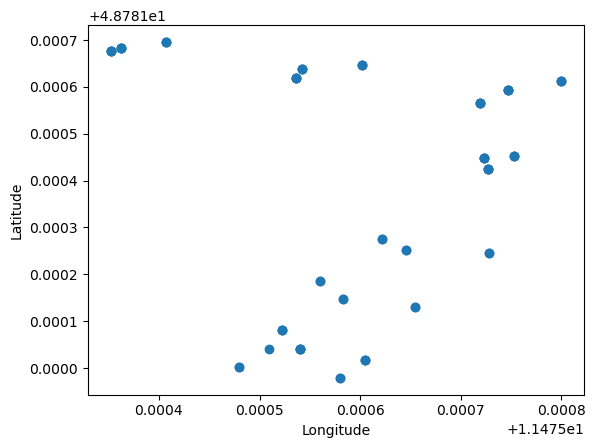

70

In [11]:
# plot the latitude and longitude
fig = plt.figure()
plt.scatter(dfarduino[" Longitude"], dfarduino[" Latitude"])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
len(dfarduino)

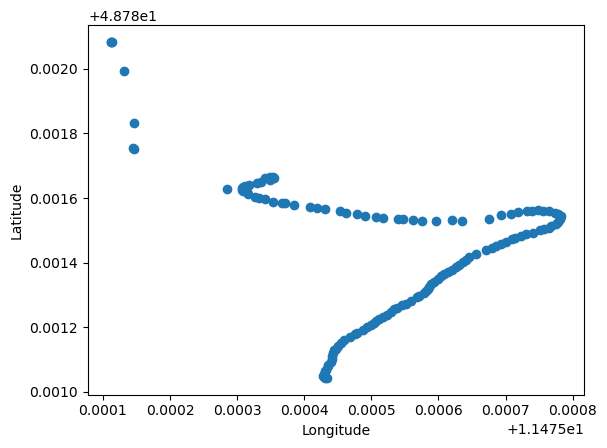

In [12]:
plt.scatter(dfpiksirtk[3], dfpiksirtk[2])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

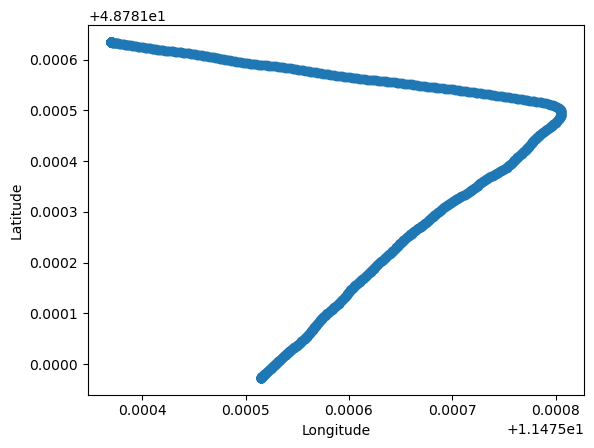

In [13]:
plt.scatter(dfsmartphone[8], dfsmartphone[7])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [14]:
def lat_lng_to_xy(lat, lng):
    
    R = 6373.0

    # convert latitude and longitude from decimal degrees to radians
    lat_rad = radians(lat)
    lng_rad = radians(lng)

    # calculate x, y coordinates
    x = R * cos(lat_rad) * cos(lng_rad)
    y = R * cos(lat_rad) * sin(lng_rad)

    return (x, y)


In [23]:
def lat_long_to_coordinates(df, lat_col, long_col):
    R = 6373.0
    
    coordinates = []
    for index, row in df.iterrows():
        #lat_rad = radians(lat)
        #lng_rad = radians(lng)
        lat = radians(row[lat_col])
        long = radians(row[long_col])
        x = R * cos(lat) * cos(long)
        y = R * cos(lat) * sin(long)
        
        coordinates.append((x, y))
    print(coordinates)    
    return coordinates

In [24]:
coord_arduino = lat_long_to_coordinates(dfarduino, ' Longitude', ' Latitude')
coord_smartphone = lat_long_to_coordinates(dfsmartphone, 8, 7)
coord_piksirtk = lat_long_to_coordinates(dfpiksirtk, 3, 2)

[(4115.415189476343, 4697.971775258548), (4115.417549356607, 4697.971326031616), (4115.416829577941, 4697.971662371047), (4115.415189476343, 4697.971775258548), (4115.417549356607, 4697.971326031616), (4115.416829577941, 4697.971662371047), (4115.416829577941, 4697.971662371047), (4115.417549356607, 4697.971326031616), (4115.415189476343, 4697.971775258548), (4115.416829577941, 4697.971662371047), (4115.417549356607, 4697.971326031616), (4115.4164458336845, 4697.964937994284), (4115.419540087763, 4697.964169090017), (4115.417894694278, 4697.965433940882), (4115.4164458336845, 4697.964937994284), (4115.419540087763, 4697.964169090017), (4115.417894694278, 4697.965433940882), (4115.419540087763, 4697.964169090017), (4115.4164458336845, 4697.964937994284), (4115.417894694278, 4697.965433940882), (4115.419540087763, 4697.964169090017), (4115.416346471336, 4697.959199980296), (4115.421299363656, 4697.957244229468), (4115.41867721221, 4697.95871749094), (4115.416346471336, 4697.959199980296)

In [22]:
x, y = np.transpose(coord_arduino)
plt.scatter(x,y)
plt.show()

ValueError: too many values to unpack (expected 2)

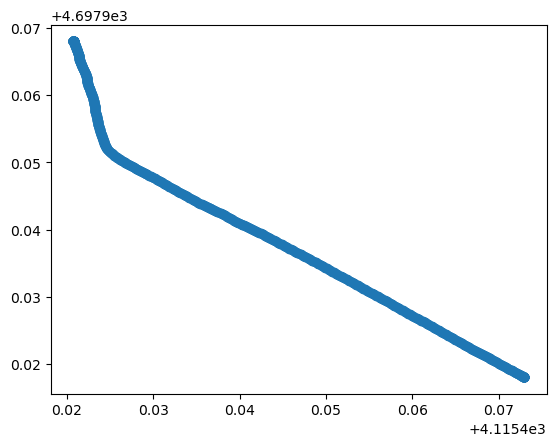

In [21]:
x, y = np.transpose(coord_smartphone)
plt.scatter(x,y)
plt.show()

In [ ]:
x, y = np.transpose(coord_piksirtk)
plt.scatter(x,y)
plt.show()

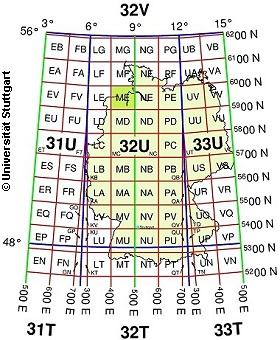

In [14]:
def convert_to_utm(df, lat_col, long_col):
    utm_proj = pyproj.Proj(proj='utm', zone=32, ellps='WGS84') # set UTM projection with zone number and ellipsoid
    utm_coords = []
    for lat, lon in zip(df[lat_col], df[long_col]):
        easting, northing = utm_proj(lon, lat) # convert latitude and longitude to UTM easting and northing
        utm_coords.append((easting, northing))
    df['utm_easting'], df['utm_northing'] = zip(*utm_coords) # add new columns to the DataFrame
    return df

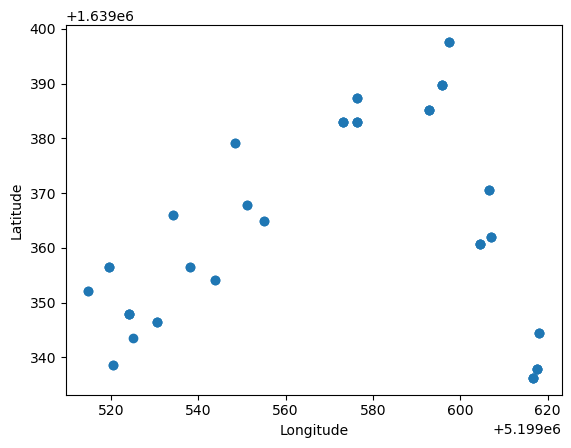

5199618.107256467

In [49]:
dfarduinonew = convert_to_utm(dfarduino,' Longitude', ' Latitude')
plt.scatter(dfarduinonew['utm_easting'], dfarduinonew['utm_northing'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
dfarduinonew['utm_easting'][0]

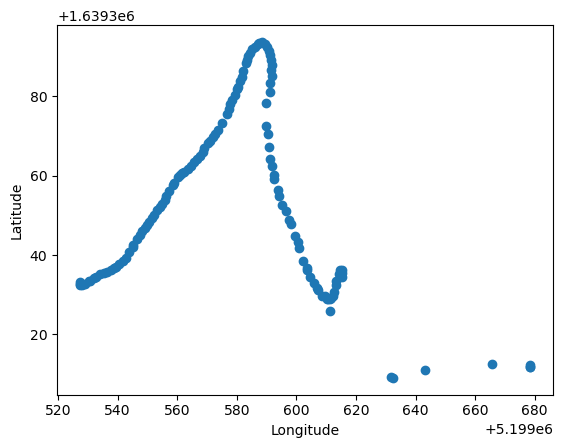

In [50]:
dfpiksirtknew = convert_to_utm(dfpiksirtk, 3, 2)
plt.scatter(dfpiksirtknew['utm_easting'], dfpiksirtknew['utm_northing'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

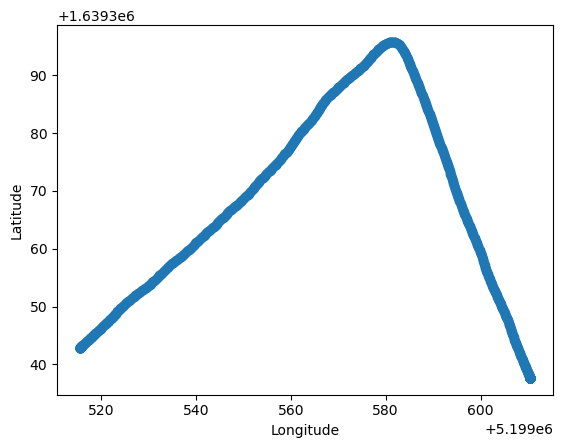

In [51]:
dfsmartphonenew = convert_to_utm(dfsmartphone, 8, 7)
plt.scatter(dfsmartphonenew['utm_easting'], dfsmartphonenew['utm_northing'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

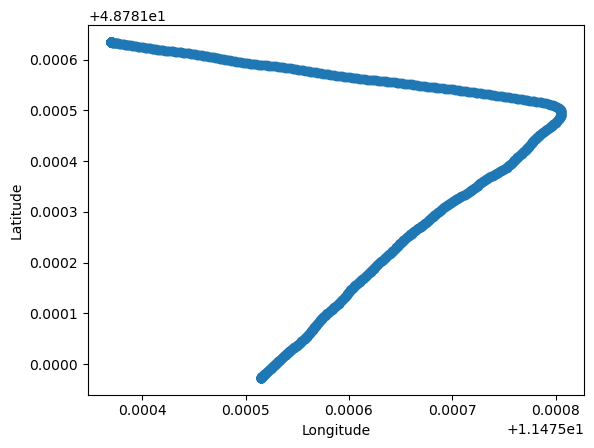

In [47]:
plt.scatter(dfsmartphone[8], dfsmartphone[7])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [52]:
utm_proj = pyproj.Proj(proj='utm', zone=32, ellps='WGS84')

In [56]:
north, east = utm_proj(dfsmartphone[8].values, dfsmartphone[7].values, inverse=True)

array([4.39979955, 4.39979955, 4.39979955, 4.39979955, 4.39979956,
       4.39979955, 4.39979954, 4.39979954, 4.39979955, 4.39979955,
       4.39979955, 4.39979955, 4.39979955, 4.39979955, 4.39979955,
       4.39979956, 4.39979957, 4.39979957, 4.39979957, 4.39979957,
       4.39979957, 4.39979957, 4.39979957, 4.39979957, 4.39979956,
       4.39979956, 4.39979956, 4.39979956, 4.39979956, 4.39979956,
       4.39979956, 4.39979956, 4.39979956, 4.39979956, 4.39979956,
       4.39979955, 4.39979956, 4.39979955, 4.39979956, 4.39979955,
       4.39979955, 4.39979955, 4.39979955, 4.39979956, 4.39979956,
       4.39979956, 4.39979956, 4.39979956, 4.39979956, 4.39979957,
       4.39979957, 4.39979957, 4.39979956, 4.39979957, 4.39979957,
       4.39979957, 4.39979957, 4.39979957, 4.39979957, 4.39979958,
       4.39979957, 4.39979958, 4.39979958, 4.39979958, 4.39979958,
       4.39979958, 4.39979958, 4.39979958, 4.39979958, 4.39979959,
       4.39979959, 4.39979959, 4.39979958, 4.39979958, 4.39979

In [58]:
north

array([4.51135892, 4.51135892, 4.51135892, 4.51135892, 4.51135892,
       4.51135892, 4.51135892, 4.51135892, 4.51135892, 4.51135892,
       4.51135892, 4.51135892, 4.51135892, 4.51135892, 4.51135892,
       4.51135892, 4.51135892, 4.51135892, 4.51135892, 4.51135892,
       4.51135892, 4.51135892, 4.51135892, 4.51135892, 4.51135892,
       4.51135892, 4.51135892, 4.51135892, 4.51135892, 4.51135892,
       4.51135892, 4.51135892, 4.51135892, 4.51135892, 4.51135892,
       4.51135892, 4.51135892, 4.51135892, 4.51135892, 4.51135892,
       4.51135892, 4.51135892, 4.51135892, 4.51135892, 4.51135892,
       4.51135892, 4.51135892, 4.51135892, 4.51135892, 4.51135892,
       4.51135892, 4.51135892, 4.51135892, 4.51135892, 4.51135892,
       4.51135892, 4.51135892, 4.51135892, 4.51135892, 4.51135892,
       4.51135892, 4.51135892, 4.51135892, 4.51135892, 4.51135892,
       4.51135892, 4.51135892, 4.51135892, 4.51135892, 4.51135892,
       4.51135892, 4.51135892, 4.51135892, 4.51135892, 4.51135

In [74]:
myProj = pyproj.Proj("+proj=utm +zone=32U, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

In [75]:
east, north = myProj(dfsmartphone[8].values, dfsmartphone[7].values)

In [76]:
east

array([681837.53251511, 681837.53314694, 681837.53312179, 681837.53270694,
       681837.53205016, 681837.53397866, 681837.5400072 , 681837.53912426,
       681837.53244422, 681837.53356926, 681837.53673405, 681837.53782942,
       681837.53753071, 681837.53803667, 681837.53828228, 681837.53585433,
       681837.53244043, 681837.53248469, 681837.53291579, 681837.53260265,
       681837.53185836, 681837.53290858, 681837.53358444, 681837.53476357,
       681837.53579214, 681837.53599823, 681837.53642262, 681837.53684819,
       681837.5323052 , 681837.53243334, 681837.53174178, 681837.53158218,
       681837.53370953, 681837.53606405, 681837.54004314, 681837.54439295,
       681837.54246858, 681837.54091524, 681837.53945936, 681837.53921658,
       681837.54207033, 681837.54237343, 681837.54401326, 681837.54564267,
       681837.54560687, 681837.54526385, 681837.5477974 , 681837.54766296,
       681837.5484793 , 681837.54748234, 681837.5476487 , 681837.54979882,
       681837.54897826, 6

In [77]:
north

array([5406137.08405851, 5406137.08118051, 5406137.08157314,
       5406137.08103771, 5406137.0948478 , 5406137.07987367,
       5406137.07267509, 5406137.07640204, 5406137.08457798,
       5406137.08361756, 5406137.08318109, 5406137.08541339,
       5406137.08592034, 5406137.08567419, 5406137.08804007,
       5406137.09424468, 5406137.10588193, 5406137.10523619,
       5406137.10699644, 5406137.10579281, 5406137.10743899,
       5406137.10373666, 5406137.10530656, 5406137.10192655,
       5406137.09789026, 5406137.09955937, 5406137.10067364,
       5406137.10033955, 5406137.09853743, 5406137.0993163 ,
       5406137.09913442, 5406137.09522084, 5406137.09659859,
       5406137.09526788, 5406137.09291135, 5406137.08822986,
       5406137.0901885 , 5406137.08790737, 5406137.09133607,
       5406137.0882045 , 5406137.08565605, 5406137.08640048,
       5406137.08926574, 5406137.09137521, 5406137.09353915,
       5406137.09981432, 5406137.10185388, 5406137.09448518,
       5406137.10100606,

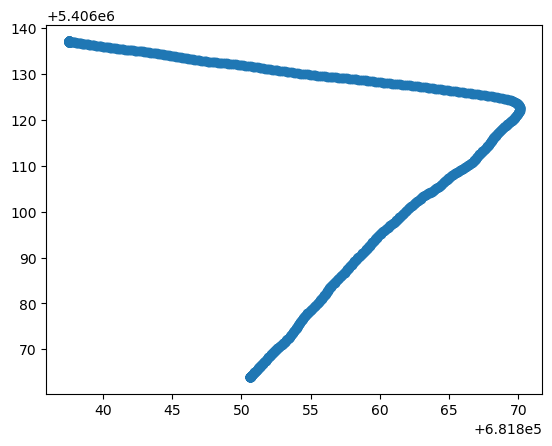

In [78]:
plt.scatter(east,north)